In [41]:
# 1. Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import classification_report, roc_auc_score, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv("train(1).csv")

In [5]:
df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [7]:
missing = df.isnull().sum().sum()
print("\nMissing values in dataset:", missing)


Missing values in dataset: 0


In [11]:
print("\nStatistical Summary:\n", df.describe())


Statistical Summary:
               target          var_0          var_1          var_2  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.100490      10.679914      -1.627622      10.715192   
std         0.300653       3.040051       4.050044       2.640894   
min         0.000000       0.408400     -15.043400       2.117100   
25%         0.000000       8.453850      -4.740025       8.722475   
50%         0.000000      10.524750      -1.608050      10.580000   
75%         0.000000      12.758200       1.358625      12.516700   
max         1.000000      20.315000      10.376800      19.353000   

               var_3          var_4          var_5          var_6  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        6.796529      11.078333      -5.065317       5.408949   
std         2.043319       1.623150       7.863267       0.866607   
min        -0.040200       5.074800     -32.562600       2.347300   
25%       

In [13]:
correlations = df.drop(columns=["ID_code"]).corr()["target"].sort_values(ascending=False)
print("\nTop 10 positively correlated features:\n", correlations.head(11)[1:])
print("\nTop 10 negatively correlated features:\n", correlations.tail(10))


Top 10 positively correlated features:
 var_6      0.066731
var_110    0.064275
var_53     0.063399
var_26     0.062422
var_22     0.060558
var_99     0.058367
var_190    0.055973
var_2      0.055870
var_133    0.054548
var_0      0.052390
Name: target, dtype: float64

Top 10 negatively correlated features:
 var_165   -0.055734
var_80    -0.057609
var_166   -0.057773
var_21    -0.058483
var_174   -0.061669
var_76    -0.061917
var_146   -0.063644
var_12    -0.069489
var_139   -0.074080
var_81    -0.080917
Name: target, dtype: float64


In [17]:
# Top 10 positively and negatively correlated features
selected_features = [
    'var_6', 'var_110', 'var_53', 'var_26', 'var_22',
    'var_99', 'var_190', 'var_2', 'var_133', 'var_0',
    'var_165', 'var_80', 'var_166', 'var_21', 'var_174',
    'var_76', 'var_146', 'var_12', 'var_139', 'var_81'
]

X = df[selected_features]
y = df["target"]



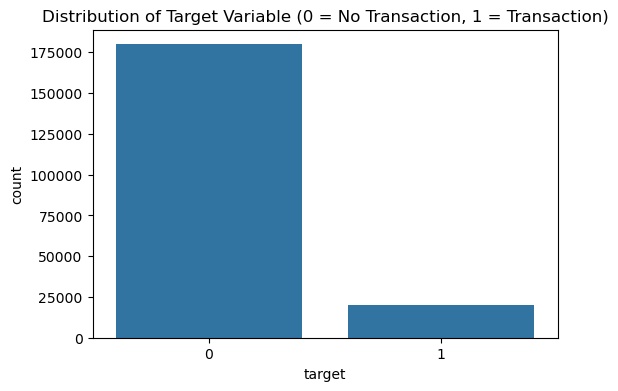

In [21]:
# Target distribution
plt.figure(figsize=(6, 4))
sns.countplot(x="target", data=df)
plt.title("Distribution of Target Variable (0 = No Transaction, 1 = Transaction)")
plt.show()

This bar chart shows a clear class imbalance, where the majority of samples belong to class 0 (no transaction), and only a small portion to class 1 (transaction). This imbalance can negatively affect model performance, especially for detecting the minority class.

In [25]:
# Split data before applying SMOTE
X = df.drop(columns=["ID_code", "target"])
y = df["target"]

In [27]:
#Test/Train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [29]:
 #Apply SMOTE only to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)



In [31]:
# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

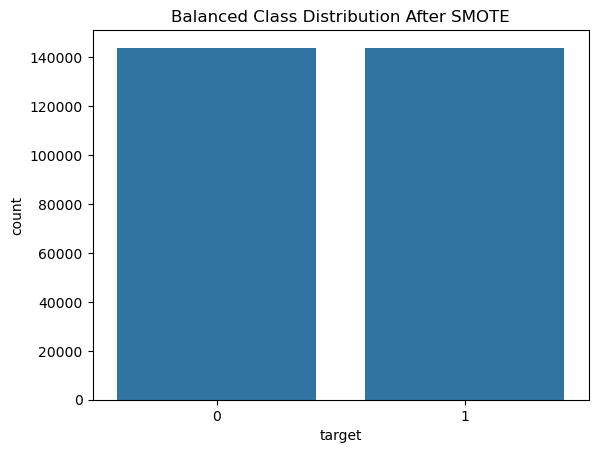

In [33]:
sns.countplot(x=y_train_resampled)
plt.title("Balanced Class Distribution After SMOTE")
plt.show()

In [35]:
# Models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss")
}



In [43]:
#Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train_resampled)

log_pred = log_model.predict(X_test_scaled)
log_proba = log_model.predict_proba(X_test_scaled)[:, 1]

log_auc = roc_auc_score(y_test, log_proba)
log_f1 = f1_score(y_test, log_pred)

print("🔹 Logistic Regression")
print("ROC AUC Score:", log_auc)
print("F1 Score:", log_f1)
print(classification_report(y_test, log_pred))

🔹 Logistic Regression
ROC AUC Score: 0.8588762551887589
F1 Score: 0.42251189737223255
              precision    recall  f1-score   support

           0       0.97      0.79      0.87     35980
           1       0.29      0.76      0.42      4020

    accuracy                           0.79     40000
   macro avg       0.63      0.78      0.65     40000
weighted avg       0.90      0.79      0.83     40000



In [45]:
#Random Forest

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train_resampled)

rf_pred = rf_model.predict(X_test_scaled)
rf_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

rf_auc = roc_auc_score(y_test, rf_proba)
rf_f1 = f1_score(y_test, rf_pred)

print("🔹 Random Forest")
print("ROC AUC Score:", rf_auc)
print("F1 Score:", rf_f1)
print(classification_report(y_test, rf_pred))


🔹 Random Forest
ROC AUC Score: 0.6973754939864325
F1 Score: 0.05494018608772707
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     35980
           1       0.25      0.03      0.05      4020

    accuracy                           0.89     40000
   macro avg       0.58      0.51      0.50     40000
weighted avg       0.84      0.89      0.85     40000



In [47]:
#XGBosst 
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train_resampled)

xgb_pred = xgb_model.predict(X_test_scaled)
xgb_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]

xgb_auc = roc_auc_score(y_test, xgb_proba)
xgb_f1 = f1_score(y_test, xgb_pred)

print("🔹 XGBoost")
print("ROC AUC Score:", xgb_auc)
print("F1 Score:", xgb_f1)
print(classification_report(y_test, xgb_pred))

C:\Users\User\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:27:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🔹 XGBoost
ROC AUC Score: 0.7315963747134255
F1 Score: 0.29453015427769985
              precision    recall  f1-score   support

           0       0.92      0.91      0.92     35980
           1       0.28      0.31      0.29      4020

    accuracy                           0.85     40000
   macro avg       0.60      0.61      0.61     40000
weighted avg       0.86      0.85      0.85     40000



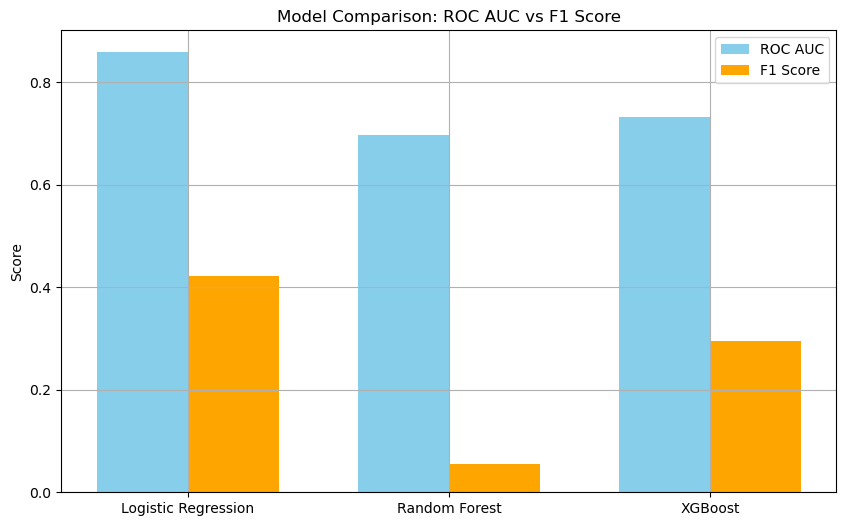

In [49]:
#Comparsion Report
import matplotlib.pyplot as plt

# Store model metrics
model_names = ["Logistic Regression", "Random Forest", "XGBoost"]
auc_scores = [log_auc, rf_auc, xgb_auc]
f1_scores = [log_f1, rf_f1, xgb_f1]

# Plot
x = range(len(model_names))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x, auc_scores, width=width, label='ROC AUC', color='skyblue')
plt.bar([p + width for p in x], f1_scores, width=width, label='F1 Score', color='orange')

plt.xticks([p + width/2 for p in x], model_names)
plt.ylabel("Score")
plt.title("Model Comparison: ROC AUC vs F1 Score")
plt.legend()
plt.grid(True)
plt.show()


In [51]:
import pickle

# Save the model
with open("logistic_model.pkl", "wb") as f:
    pickle.dump(log_model, f)

print("✅ Logistic Regression model saved as 'logistic_model.pkl'")


✅ Logistic Regression model saved as 'logistic_model.pkl'
